In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
    'machine-learning-databases/wine/wine.data', header=None)
df.columns= ['Class label', 'Alcohol',
              'Malic acid', 'Ash','Alcalinity of ash',
              'Magnesium','Total phenols', 'Flavanoids',
              'Nonflavanoid phenols','Proanthocyanins',
              'Color intensity', 'Hue','OD280/OD315 of diluted wines','Proline']
df.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class label                   178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [4]:
import numpy as np
print(np.unique(df['Class label']))

[1 2 3]


In [5]:
X,y = df.iloc[:,1:].values, df.iloc[:,0].values

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,
                                   random_state=0,
                                   stratify=y)

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
stdsc = StandardScaler()
X_train_scaled = stdsc.fit_transform(X_train)
X_test_scaled = stdsc.fit_transform(X_test)

In [9]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1',
                       C=1.0,
                       solver='liblinear',
                       multi_class='ovr')
lr.fit(X_train_scaled, y_train)
print('Training Accuracy: ', lr.score(X_train_scaled, y_train))

Training Accuracy:  1.0


In [10]:
print('Test Accuracy: ', lr.score(X_test_scaled, y_test))

Test Accuracy:  1.0


In [11]:
lr2 = LogisticRegression(penalty='l2',
                        C=1.0,
                        solver='lbfgs',
                        multi_class='ovr')
lr2.fit(X_train_scaled, y_train)
print('Training Accuracy: ',lr2.score(X_train_scaled, y_train))

Training Accuracy:  1.0


In [12]:
print('Test Accuracy: ', lr2.score(X_test_scaled, y_test))

Test Accuracy:  1.0


In [13]:
lr.intercept_

array([-1.2630524 , -1.21583683, -2.37046191])

In [14]:
print(lr.coef_)

[[ 1.24521944  0.18127292  0.7422073  -1.16000869  0.          0.
   1.17465235  0.          0.          0.          0.          0.54184882
   2.51156289]
 [-1.53696402 -0.3873016  -0.9950105   0.36487175 -0.05963185  0.
   0.66798158  0.          0.         -1.93410813  1.2332645   0.
  -2.23171009]
 [ 0.13575025  0.1683992   0.35730705  0.          0.          0.
  -2.43768108  0.          0.          1.56345499 -0.81887016 -0.49265801
   0.        ]]


In [15]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [35]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import make_scorer

In [17]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,
                                   random_state=0,
                                   stratify=y)

In [36]:

sfs = SFS(RandomForestClassifier(n_estimators=100, n_jobs=4, random_state=0),
          k_features=7, # the lower the features we want, the longer this will take
          forward=False,
          floating=False,
          verbose=2,
          scoring='accuracy',
          cv=2)

sfs = sfs.fit(np.array(X_train), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    2.7s finished

[2021-02-07 00:15:46] Features: 12/7 -- score: 0.967741935483871[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    2.3s finished

[2021-02-07 00:15:48] Features: 11/7 -- score: 0.9516129032258065[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    2.1s finished

[2021-02-07 00:15:50] Features: 10/7 -- score: 0.935483870967742[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1

In [37]:
sfs.k_feature_idx_

(0, 1, 2, 6, 9, 10, 12)

In [38]:
k7 = list(sfs.k_feature_idx_)

In [39]:
print(df.columns[1:][k7])

Index(['Alcohol', 'Malic acid', 'Ash', 'Flavanoids', 'Color intensity', 'Hue',
       'Proline'],
      dtype='object')


In [40]:
sfs.subsets_

{13: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
  'cv_scores': array([0.91935484, 0.96774194]),
  'avg_score': 0.9435483870967742,
  'feature_names': ('0',
   '1',
   '2',
   '3',
   '4',
   '5',
   '6',
   '7',
   '8',
   '9',
   '10',
   '11',
   '12')},
 12: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12),
  'cv_scores': array([0.9516129 , 0.98387097]),
  'avg_score': 0.967741935483871,
  'feature_names': ('0',
   '1',
   '2',
   '3',
   '4',
   '5',
   '6',
   '7',
   '8',
   '9',
   '10',
   '12')},
 11: {'feature_idx': (0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 12),
  'cv_scores': array([0.9516129, 0.9516129]),
  'avg_score': 0.9516129032258065,
  'feature_names': ('0', '1', '2', '3', '5', '6', '7', '8', '9', '10', '12')},
 10: {'feature_idx': (0, 1, 2, 3, 5, 6, 8, 9, 10, 12),
  'cv_scores': array([0.91935484, 0.9516129 ]),
  'avg_score': 0.935483870967742,
  'feature_names': ('0', '1', '2', '3', '5', '6', '8', '9', '10', '12')},
 9: {'feature_idx': (0, 1, 2, 3, 6, 8

In [45]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
13,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.9193548387096774, 0.967741935483871]",0.943548,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.104096,0.0241935,0.0241935
12,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12)","[0.9516129032258065, 0.9838709677419355]",0.967742,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12)",0.0693976,0.016129,0.016129
11,"(0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 12)","[0.9516129032258065, 0.9516129032258065]",0.951613,"(0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 12)",0,0,0
10,"(0, 1, 2, 3, 5, 6, 8, 9, 10, 12)","[0.9193548387096774, 0.9516129032258065]",0.935484,"(0, 1, 2, 3, 5, 6, 8, 9, 10, 12)",0.0693976,0.016129,0.016129
9,"(0, 1, 2, 3, 6, 8, 9, 10, 12)","[0.9193548387096774, 0.967741935483871]",0.943548,"(0, 1, 2, 3, 6, 8, 9, 10, 12)",0.104096,0.0241935,0.0241935
8,"(0, 1, 2, 3, 6, 9, 10, 12)","[0.9354838709677419, 0.967741935483871]",0.951613,"(0, 1, 2, 3, 6, 9, 10, 12)",0.0693976,0.016129,0.016129
7,"(0, 1, 2, 6, 9, 10, 12)","[0.9516129032258065, 0.9516129032258065]",0.951613,"(0, 1, 2, 6, 9, 10, 12)",0,0,0


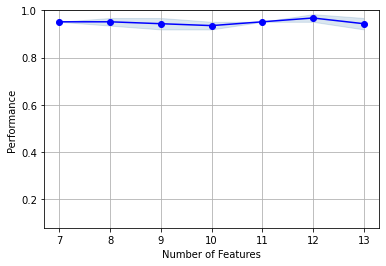

In [47]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig1 = plot_sfs(sfs.get_metric_dict())
plt.ylim([.08,1])
plt.grid()
plt.show()

In [48]:
RFR = RandomForestClassifier(n_estimators=100, n_jobs=4, random_state=0)
RFR.fit(X_train[:,k7],y_train)
print('Training Accuracy: ', RFR.score(X_train[:, k7],y_train))
print('Test Accuracy: ',RFR.score(X_test[:,k7],y_test))

Training Accuracy:  1.0
Test Accuracy:  1.0


In [49]:
RFR = RandomForestClassifier(n_estimators=100, n_jobs=4, random_state=0)
RFR.fit(X_train,y_train)
print('Training Accuracy: ', RFR.score(X_train,y_train))
print('Test Accuracy: ',RFR.score(X_test,y_test))

Training Accuracy:  1.0
Test Accuracy:  1.0
